In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('health_risk_classification.csv')

In [5]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [9]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

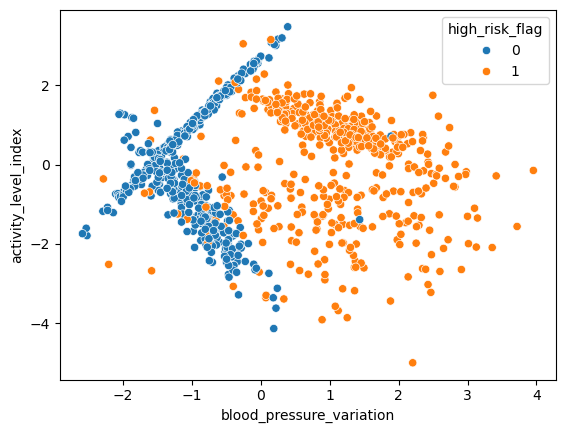

In [11]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])

In [12]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [13]:
X=df.drop("high_risk_flag",axis=1)

In [14]:
y=df["high_risk_flag"]

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

<Axes: >

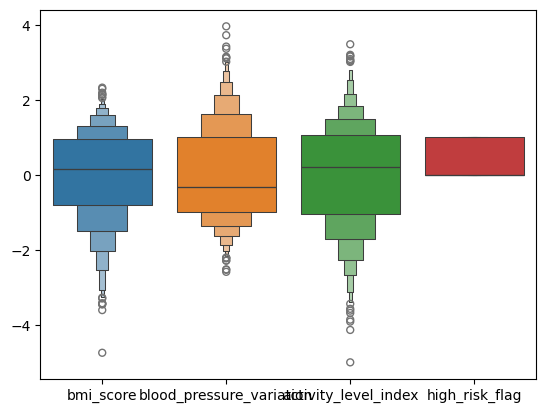

In [19]:
sns.boxenplot(df)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

In [27]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [28]:
y_pred=classifier.predict(X_test_scaled)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [34]:
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report:\n ", classification_report(y_pred,y_test))


confusion matrix: 
  [[126  12]
 [  2 110]]
accuracy score:  0.944
classification report:
                precision    recall  f1-score   support

           0       0.98      0.91      0.95       138
           1       0.90      0.98      0.94       112

    accuracy                           0.94       250
   macro avg       0.94      0.95      0.94       250
weighted avg       0.95      0.94      0.94       250



In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree',weights='uniform')

In [36]:
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report:\n ", classification_report(y_pred,y_test))

confusion matrix: 
  [[126  12]
 [  2 110]]
accuracy score:  0.944
classification report:
                precision    recall  f1-score   support

           0       0.98      0.91      0.95       138
           1       0.90      0.98      0.94       112

    accuracy                           0.94       250
   macro avg       0.94      0.95      0.94       250
weighted avg       0.95      0.94      0.94       250



In [37]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',weights='uniform')
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report:\n ", classification_report(y_pred,y_test))

confusion matrix: 
  [[126   9]
 [  2 113]]
accuracy score:  0.956
classification report:
                precision    recall  f1-score   support

           0       0.98      0.93      0.96       135
           1       0.93      0.98      0.95       115

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [38]:
df_reg = pd.read_csv("12-house_energy_regression.csv")


In [39]:
df_reg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [40]:
df_reg.head()


,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [41]:
df_reg.describe()


,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


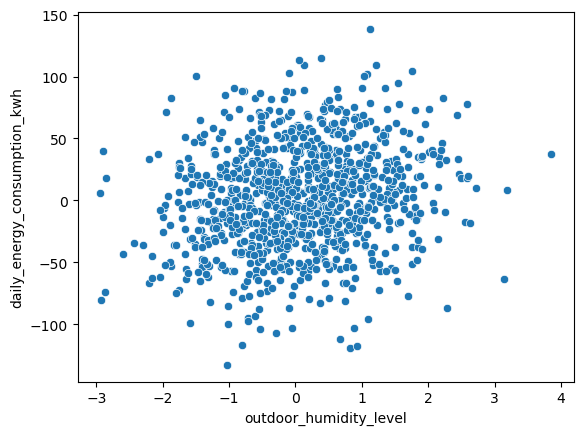

In [43]:
sns.scatterplot(x=df_reg['outdoor_humidity_level'],y=df_reg['daily_energy_consumption_kwh'])
plt.show()

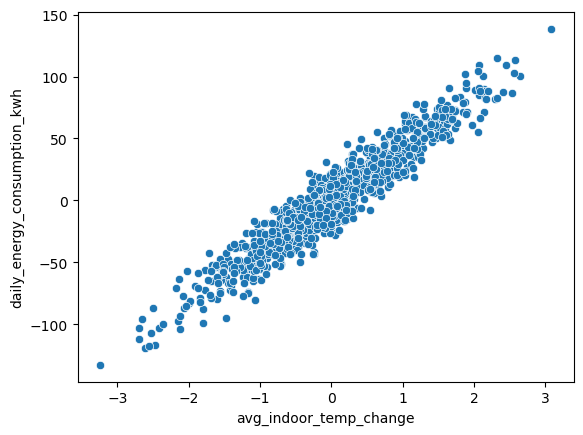

In [44]:
sns.scatterplot(x=df_reg['avg_indoor_temp_change'],y=df_reg['daily_energy_consumption_kwh'])
plt.show()

In [46]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [51]:
X=df_reg.drop("daily_energy_consumption_kwh",axis=1)
y=df_reg["daily_energy_consumption_kwh"]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [54]:
scaler=StandardScaler()

In [55]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
regression=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
regression.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [61]:
y_pred=regression.predict(X_test_scaled)

In [62]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [63]:
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))

r2 score:  0.9178202208973447
mean absolute error:  9.955138735146939
mean squared error:  146.38152232025342


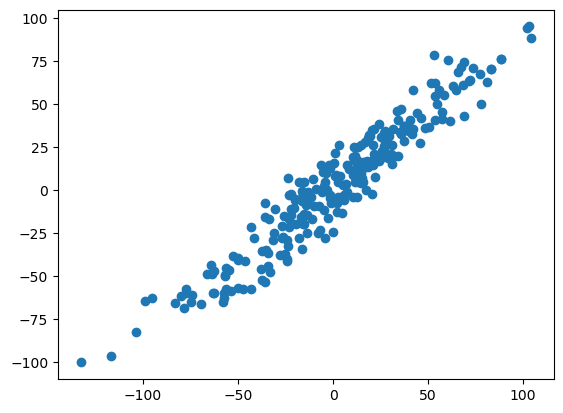

In [64]:
plt.scatter(y_test,y_pred)
plt.show()

In [65]:
regressor=KNeighborsRegressor(n_neighbors=7,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=7)

r2 score:  0.9169496823425327
mean absolute error:  9.975825952929563
mean squared error:  147.93215631176938


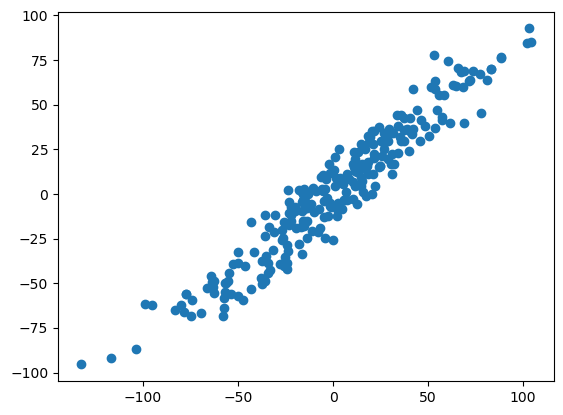

In [66]:
y_pred=regressor.predict(X_test_scaled)
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()